# Kinetic Proofreading

An important aspect of biosynthesis is accuracy. The essential parts of a cell that store, transmit, and express information are formed by macromolecules including DNA, RNA, and proteins. All these macromolecules are synthesized piece by piece along a chain-like structure, with the help of molecular machinery such as DNA/RNA polymerase and ribosome. Errors in each step of their syntheses could result in defective products that cannot function properly, endangering the life of the cell and the organism. In reality, the error rate of biosynthesis is surprisingly low. A major mechanism that helps achieving such high accuracy is "kinetic proofreading". In this note, we will study how kinetic proofreading works by modeling an abstract biosynthesis process with and without proofreading.

## Without proofreading

Consider a model where a molecular machine synthesizes a product by recruiting a substrate and assembling it into the desired structure. This could represent one step in the synthesis of a macromolecule, such as incorporating one amino acid into a protein. The problem is that there are multiple types of substrates available, yet only one of them is correct. For protein synthesis, for example, there are 20 types of amino acids possible, but each residue of the protein must be made of a specific amino acid according to its primary sequence. The specificity is provided by the codon sequence on the mRNA template, which is recognized by the tRNA that carries the correct amino acid to be incorporated. However, once in a while, a wrong substrate might slip in by chance, because of nonspecific interaction with the recognition site. Thus, a wrong amino acid could be incorporated instead of the correct one, often resulting in the protein not being able to fold or function.

This description can be represented by the following competing processes:
\begin{align}
C + R \mathop{\rightleftarrows}^{k}_{k_C} \mathit{CR} \mathop{\rightarrow}^{w} \mathit{CP} \\
D + R \mathop{\rightleftarrows}^{k}_{k_D} \mathit{DR} \mathop{\rightarrow}^{w} \mathit{DP}
\end{align}
Here $C$ denotes the correct substrate, $R$ the recognition site, $\mathit{CR}$ the correct substrate bound to the recognition site, and $\mathit{CP}$ the correct product. Similarly, $D$ denotes a wrong substrate, $\mathit{DR}$ the wrong substrate bound to the recognition site, and $\mathit{DP}$ the defective product. Notice that we have assumed that the correct and wrong substrates have the same binding rate, $k$, to the recognition site, as well as the same incorporation rate, $w$. The only difference between the correct and wrong substrates is in the unbinding rate, $k_C$ and $k_D$ respectively. This assumption is largely true for the biosynthesis of proteins and nucleic acids.

In order for the wrong substrate to have a low chance of being incorporated "by mistake", its unbinding rate should be much larger than that for the correct substrate, i.e., $k_D \gg k_C$. We also assume that the incorporation rate $w$ is small compared to both unbinding rates, i.e., $w \ll k_C \ll k_D$. Finally, we assume that there is a large pool of both correct and wrong substrates, so that their concentrations are equal and constant. Therefore, any difference in the production rate of the correct and defective products will be due to the kinetics of the processes.

Under those assumptions, we will focus on the abundance of the chemical species $\mathit{CR}$, $\mathit{CP}$, $\mathit{DR}$, and $\mathit{DP}$. Under our assumptions, the production rates of the bound states $\mathit{CR}$ and $\mathit{DR}$ will be constant and simply redefined as $k$. Therefore we can represent the processes involving those species by the reactions:
\begin{align}
&\mathbb{0} \xrightarrow{k} \mathit{CR} \\
&\mathit{CR} \xrightarrow{k_C} \mathbb{0} \\
&\mathit{CR} \xrightarrow{w} \mathit{CP} \\
&\mathbb{0} \xrightarrow{k} \mathit{DR} \\
&\mathit{DR} \xrightarrow{k_D} \mathbb{0} \\
&\mathit{DR} \xrightarrow{w} \mathit{DP}
\end{align}
The reactant and product stoichiometry matrices are:
\begin{equation}
\mathbf{R} = \left(
\begin{array}{ll}
0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 1 & 0
\end{array} \right)
\qquad
\mathbf{P} = \left(
\begin{array}{ll}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1
\end{array} \right)
\end{equation}

We can study these reactions using either stochastic simulation (`StochSimulation`) or deterministic rate equations (`RateEquations`).

In [1]:
import numpy as np
import scipy.integrate as intgr
import matplotlib.pyplot as plt
from Gillespie import StochSimulation
from mass_action import RateEquations

We have written the `RateEquations` class with very similar syntax to the `StochSimulation` class, so that the ways to use them are almost identical. To specify a model, we just need to supply the stoichiometry matrices. Below is a demonstration for both classes.

In [3]:
class SS_WithoutProofreading(StochSimulation):
    """
    make stochastic simulation of biosynthesis model without kinetic proofreading.
    """
    
    def __init__(self, rates, init, record=True):
        """
        modify the initialization to specify the stoichiometry matrices.
        """
        reactants = [[0, 0, 0, 0],
                     [1, 0, 0, 0],
                     [1, 0, 0, 0],
                     [0, 0, 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 1, 0]]
        products =  [[1, 0, 0, 0],
                     [0, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 0],
                     [0, 0, 0, 1]]
        StochSimulation.__init__(self, (reactants, products), rates, init, record=record)

In [4]:
class RE_WithoutProofreading(RateEquations):
    """
    solve rate equations of biosynthesis model without kinetic proofreading.
    """
    
    def __init__(self, rates, init, record=True):
        """
        modify the initialization to specify the stoichiometry matrices.
        """
        reactants = [[0, 0, 0, 0],
                     [1, 0, 0, 0],
                     [1, 0, 0, 0],
                     [0, 0, 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 1, 0]]
        products =  [[1, 0, 0, 0],
                     [0, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 0],
                     [0, 0, 0, 1]]
        RateEquations.__init__(self, (reactants, products), rates, init, record=record)

Let us choose the parameters for the reaction rates. Recall that they should satisfy $w \ll k_C \ll k_D$. In order to have decent amount of $\mathit{CR}$ and $\mathit{DR}$, we should also have $k \gg k_C, k_D$. So all together we need $w \ll k_C \ll k_D \ll k$. For example, we can have:

In [5]:
k = 1000.   # binding rate, same for C and D
kD = 100.   # unbinding rate of DR
kC = 1.     # unbinding rate of CR
w = 0.1     # incorporation rate, same for C and D

rates = [k, kC, w, k, kD, w]
inits = [0, 0, 0, 0]

We will run both the stochastic simulation and the rate equations to compare results. We start from initial conditions where no products or intermediates are present.

In [6]:
T = 15.
swo = SS_WithoutProofreading(rates, inits)    # stochastic simulation
swo.run(T, maxstep=100000, nmax=10000)
ss_time_hist = swo.time_hist[1:]    # time history, excluding t=0
ss_num_hist = np.array(swo.numbers_hist)[1:]    # abundance history of all species

In [7]:
dt = 0.1
rwo = RE_WithoutProofreading(rates, inits)    # rate equations
rwo.run(T, dt)
re_time_hist = rwo.time_hist[1:]    # time history, excluding t=0
re_num_hist = np.array(rwo.numbers_hist)[1:]    # abundance history of all species

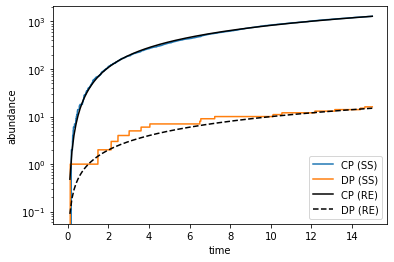

In [8]:
plt.figure()
plt.plot(ss_time_hist, ss_num_hist[:,1], label='CP (SS)')    # CP abundance from stochastic simulation
plt.plot(ss_time_hist, ss_num_hist[:,3], label='DP (SS)')    # DP abundance from stochastic simulation
plt.plot(re_time_hist, re_num_hist[:,1], 'k', label='CP (RE)')    # CP abundance from rate equations
plt.plot(re_time_hist, re_num_hist[:,3], 'k--', label='DP (RE)')    # DP abundance from rate equations
plt.xlabel('time')
plt.ylabel('abundance')
plt.yscale('log')
plt.legend()
plt.show()

We can now plot the relative error, defined as the ratio of the production rate of the defective and correct products.

/tmp/ipykernel_1067464/1427339997.py:2: RuntimeWarning: divide by zero encountered in true_divide
  ss_ratio = ss_num_hist[:,3] / ss_num_hist[:,1]    # stochastic simulation result
/tmp/ipykernel_1067464/1427339997.py:2: RuntimeWarning: invalid value encountered in true_divide
  ss_ratio = ss_num_hist[:,3] / ss_num_hist[:,1]    # stochastic simulation result


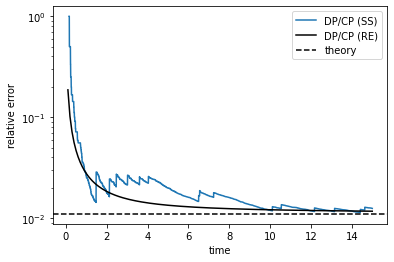

In [9]:
th_ratio = (kC + w) / (kD + w)    # theoretical value
ss_ratio = ss_num_hist[:,3] / ss_num_hist[:,1]    # stochastic simulation result
re_ratio = re_num_hist[:,3] / re_num_hist[:,1]    # rate equations result

plt.figure()
plt.plot(ss_time_hist, ss_ratio, label='DP/CP (SS)')
plt.plot(re_time_hist, re_ratio, 'k', label='DP/CP (RE)')
plt.axhline(th_ratio, color='k', ls='--', label='theory')
plt.yscale('log')
plt.xlabel('time')
plt.ylabel('relative error')
plt.legend()
plt.show()

## With proofreading

Let us now introduce "proofreading" into the model. The idea is that there is an extra step after the binding of the substrate (correct or not) and before the incorporation into the final product. This step can be thought of as the "activation" of the bound complex (CR or DR) --- it must be activated before being incorporated. The point of having this extra step is that it allows another chance for the incorrectly bound substrate to unbind. The processes can be represented by the following schematic figure:

<img src="source/with-proofreading.png" alt="with-proofreading.png" align="center" width="300"/>

Here $\mathit{CR'}$ represents the activated complex bound with the correct substrate, and $\mathit{DR'}$ for the wrong substrate. There are a few things to note. First, the rate of activation, $k'$, is assumed to be the same for the correct and wrong substrates. This is similar to the binding rate $k$ being independent of the substrates; both assumptions are largely true in reality. Second, there is no backward process from the activated state back to the inactivated state. This is important because it reflects the fact that the activation process is "driven", i.e., being facilitated by underlying mechanisms that cost energy. In the example of protein synthesis, this step corresponds to the hydrolysis of GTP, which is the energy source. As a result of driving, the backward reaction rate is negligible compared to the forward reaction, thus keeping the activated state out of equilibrium (which is what "kinetic" in "kinetic proofreading" refers to, as opposed to being in "thermodynamic" equilibrium). Finally, we have assumed that the unbinding rate of the activated complex is the same as for the inactivated complex, $k_C$ for the correct substrate and $k_D$ for the wrong substrate. This is also largely true for the biological examples. The fact that the substrate now has a second chance to unbind with the same unbinding rate leads to the accuracy being doubled exponentially (i.e., error probability being squared), as we will see below.

Let us solve this model in the same way as we did for the simpler model without proofreading above. To compute the error rate, we will only study the average behavior, which can be solved using rate equations. First, let us represent the processes involved in the model by chemical reactions, which will allow us to extract the stoichiometry matrices. In the current model, we now have 6 species to consider: $\mathit{CR}$, $\mathit{CR'}$, $\mathit{CP}$, $\mathit{DR}$, $\mathit{DR'}$, and $\mathit{DP}$. There are 10 reactions:
\begin{align}
&\mathbb{0} \xrightarrow{k} \mathit{CR} \\
&\mathit{CR} \xrightarrow{k_C} \mathbb{0} \\
&\mathit{CR} \xrightarrow{k'} \mathit{CR'} \\
&\mathit{CR'} \xrightarrow{k_C} \mathbb{0} \\
&\mathit{CR'} \xrightarrow{w} \mathit{CP} \\
&\mathbb{0} \xrightarrow{k} \mathit{DR} \\
&\mathit{DR} \xrightarrow{k_D} \mathbb{0} \\
&\mathit{DR} \xrightarrow{k'} \mathit{DR'} \\
&\mathit{DR'} \xrightarrow{k_D} \mathbb{0} \\
&\mathit{DR'} \xrightarrow{w} \mathit{DP}
\end{align}
The stoichiometry matrices are:
\begin{equation}
\mathbf{R} = \left(
\begin{array}{ll}
0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 & 0
\end{array} \right)
\qquad
\mathbf{P} = \left(
\begin{array}{ll}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1
\end{array} \right)
\end{equation}

Since here we are interested in the average accuracy of synthesis, it suffices to solve the rate equations. We can use the above stoichiometry matrices to construct a derived class of the general `RateEquations` class.

In [10]:
class RE_WithProofreading(RateEquations):
    """
    solve rate equations of biosynthesis model with kinetic proofreading.
    """
    
    def __init__(self, rates, init, record=True):
        """
        modify the initialization to specify the stoichiometry matrices.
        """
        reactants = [[0, 0, 0, 0, 0, 0],
                     [1, 0, 0, 0, 0, 0],
                     [1, 0, 0, 0, 0, 0],
                     [0, 1, 0, 0, 0, 0],
                     [0, 1, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 1, 0, 0],
                     [0, 0, 0, 1, 0, 0],
                     [0, 0, 0, 0, 1, 0],
                     [0, 0, 0, 0, 1, 0]]
        products =  [[1, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0],
                     [0, 1, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0],
                     [0, 0, 1, 0, 0, 0],
                     [0, 0, 0, 1, 0, 0],
                     [0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 1, 0],
                     [0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 1]]
        RateEquations.__init__(self, (reactants, products), rates, init, record=record)

We need to choose a value for the new parameter $k'$. To achieve better accuracy, we would like to have $k' \ll k_C, k_D$. For example, we could choose $k'$ to have the same order of magnitude as $w$.

In [11]:
ka = 0.1    # activation rate, same for C and D

rates2 = [k, kC, ka, kC, w, k, kD, ka, kD, w]    # rate constants
inits2 = [0, 0, 0, 0, 0, 0]    # initial values

Let us now simulate the processes.

In [12]:
T2 = 15.
dt2 = 0.1
rwp = RE_WithProofreading(rates2, inits2)
rwp.run(T2, dt2)
re_time_hist2 = rwp.time_hist[1:]    # time history, excluding t=0
re_num_hist2 = np.array(rwp.numbers_hist)[1:]    # abundance history of all species

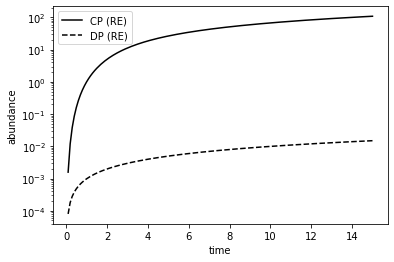

In [13]:
plt.figure()
plt.plot(re_time_hist2, re_num_hist2[:,2], 'k', label='CP (RE)')    # CP abundance
plt.plot(re_time_hist2, re_num_hist2[:,5], 'k--', label='DP (RE)')    # DP abundance
plt.xlabel('time')
plt.ylabel('abundance')
plt.yscale('log')
plt.legend()
plt.show()

Let us again plot the relative error. For reference, we also plot the error from the model without proofreading.

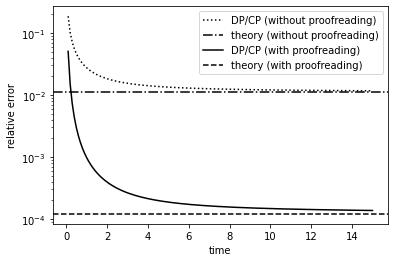

In [14]:
th_ratio2 = (kC + w) * (kC + ka) / (kD + w) / (kD + ka)    # theoretical value
re_ratio2 = re_num_hist2[:,5] / re_num_hist2[:,2]    # rate equations result

plt.figure()
plt.plot(re_time_hist, re_ratio, 'k:', label='DP/CP (without proofreading)')    # error without proofreading
plt.axhline(th_ratio, color='k', ls='-.', label='theory (without proofreading)')
plt.plot(re_time_hist2, re_ratio2, 'k', label='DP/CP (with proofreading)')    # error with proofreading
plt.axhline(th_ratio2, color='k', ls='--', label='theory (with proofreading)')
plt.yscale('log')
plt.xlabel('time')
plt.ylabel('relative error')
plt.legend()
plt.show()

Compared to the model without proofreading, we see that, at steady state, the error probability is orders of magnitude lower. Theoretically, one can show (by solving the steady state of the rate equations) that the relative error, represented by the ratio of the steady state production rate for the correct and wrong substrates, is given by:
\begin{equation}
\frac{\dot{N}_{CP}}{\dot{N}_{DP}} = \frac{k_C + w}{k_D + w} \approx \frac{k_C}{k_D} \qquad \text{(without proofreading)}
\end{equation}
and
\begin{equation}
\frac{\dot{N}_{CP}}{\dot{N}_{DP}} = \frac{k_C + k'}{k_D + k'} \, \frac{k_C + w}{k_D + w} \approx \Big( \frac{k_C}{k_D} \Big)^2 \qquad \text{(with proofreading)}
\end{equation}
Thus, for $k_C \ll k_D$, the error probability is "squared", or equivalently speaking, the accuracy of biosynthesis is "doubled in orders of magnitude".

Note, however, that the price for the increased accuracy is the reduction in speed. One can show that the production rate of the correct product is given by:
\begin{equation}
\dot{N}_{CP} = \frac{k}{k_C + w} \, w \approx \frac{k}{k_C} \, w \qquad \text{(without proofreading)}
\end{equation}
and
\begin{equation}
\dot{N}_{CP} = \frac{k'}{k_C + w} \, \frac{k}{k_C + k'} \, w \approx \frac{k'}{k_C} \, \frac{k}{k_C} \, w \qquad \text{(with proofreading)}
\end{equation}
As can be seen from the plot below, the production rate is slower with proofreading than without.

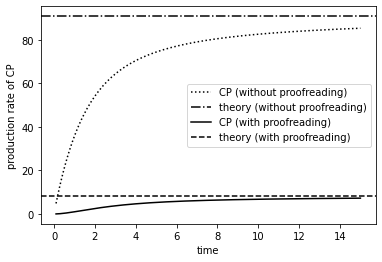

In [15]:
re_prod_rate = re_num_hist[:,1] / re_time_hist    # average production rate of CP without proofreading
re_prod_rate2 = re_num_hist2[:,2] / re_time_hist2    # average production rate of CP with proofreading
th_prod_rate = k / (kC + w) * w
th_prod_rate2 = k / (kC + ka) * ka / (kC + w) * w

plt.figure()
plt.plot(re_time_hist, re_prod_rate, 'k:', label='CP (without proofreading)')    # production without proofreading
plt.axhline(th_prod_rate, color='k', ls='-.', label='theory (without proofreading)')
plt.plot(re_time_hist2, re_prod_rate2, 'k', label='CP (with proofreading)')    # production with proofreading
plt.axhline(th_prod_rate2, color='k', ls='--', label='theory (with proofreading)')
plt.xlabel('time')
plt.ylabel('production rate of CP')
plt.legend()
plt.show()